# Titanic Data Set

### Models used with hyperparameters :

Logistic Regression (Penalty, C, solver)

Decision Tree (max_leaf_nodes,criterion,splitter)

KNN Classifier (n_neighbors)

SVM Models : LinearSCV(penalty, C)
             rbf (C, gamma)
             Sigmoid (C, gamma)
             polynomial (kernel, C, degree)
             
Bagging : Decision Tree (base_estimator__max_depth,max_samples, n_estimators)
          Logistic Regression (base_estimator__C,max_samples, n_estimators)
          
Pasting : Decision Tree (base_estimator__max_depth,max_samples, n_estimators)
          Logistic Regression (base_estimator__C,max_samples, n_estimators)
          
Random Forests (n_estimators, max_features,max_depth,criterion)

Ada Boost (base_estimator__criterion, base_estimator__splitter,base_estimator__max_depth, n_estimators,learning_rate)

Gradient Boost (max_depth, n_estimators, learning_rate)

Extra Trees (n_estimators,max_features, max_depth,criterion)

XG Boost ('max_depth,n_estimators,learning_rate,min_child_weight,subsample)

### XGBoost Classifier is the best model as the cross validation score is high and the difference between train score and test score is less.
Best model based on Scoring Method = Accuracy

The best model choosen based on CV score (0.85) is : XG Boost.

Best Mean Cross Validation Score is 0.8514052795031055

Parameters for the model {'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 7, 'n_estimators': 150, 'subsample': 0.9}

Train score is 0.8951310861423221

Test score is 0.8333333333333334
              


### Importing Libraries

In [1]:
!pip install feature-engine

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pathlib import Path
%matplotlib inline

### Importing the data set

In [3]:
data = pd.read_csv('titanic.csv')

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Exploring the data 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Visualization

In [6]:
# let's inspect the variable values

for var in data.columns:
    print(var, data[var].unique()[0:20], '\n')

PassengerId [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 

Survived [0 1] 

Pclass [3 1 2] 

Name ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima'] 

Sex ['male' 'female'] 

Age [22. 38. 26. 35. nan 54.  2. 27. 14.  4. 58. 20. 39. 55. 31. 34. 15. 28.
  8. 19.] 

SibSp [1 0 3 4 2 5 8] 

Parch [0 1 2 5 3 4 6] 

Ticket ['A/5 21171' 'PC 1

In [7]:
# make list of variables  types

# numerical: discrete vs continuous
discrete = [var for var in data.columns if data[var].dtype!='O' and var!='Survived' and data[var].nunique()<10]
continuous = [var for var in data.columns if data[var].dtype!='O' and var!='Survived' and var not in discrete]

# mixed
mixed = ['Cabin']

# categorical
categorical = [var for var in data.columns if data[var].dtype=='O' and var not in mixed]

print(f'There are {len(discrete)} discrete variables')
print(f'There are {len(continuous)} continuous variables')
print(f'There are {len(categorical)} categorical variables')
print(f'There are {len(mixed)} mixed variables')

There are 3 discrete variables
There are 3 continuous variables
There are 4 categorical variables
There are 1 mixed variables


In [8]:
# missing values
data.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [9]:
# cardinality (number of different categories)

data[categorical+mixed].nunique()

Name        891
Sex           2
Ticket      681
Embarked      3
Cabin       147
dtype: int64

In [10]:
# Cabin- mixed variable
# \d regular expression for digts . \d+ one or more digits
data['Cabin_num'] = data['Cabin'].str.extract('(\d+)') # captures numerical part
data['Cabin_num'] = data['Cabin_num'].astype('float')
data['Cabin_cat'] = data['Cabin'].str[0] # captures the first letter

# show dataframe
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_num,Cabin_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,85.0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,123.0,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN


In [11]:
data['Title'] = data['Name'].str.split(',').str[1].str.split('\s+').str[1]
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_num,Cabin_cat,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,85.0,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,123.0,C,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN,Mr.


In [12]:
data['Title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Major.         2
Mlle.          2
Col.           2
Don.           1
Lady.          1
Ms.            1
Mme.           1
Jonkheer.      1
Sir.           1
the            1
Capt.          1
Name: Title, dtype: int64

In [13]:
data['Cabin_cat'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin_cat, dtype: int64

In [14]:
# drop original mixed
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_num,Cabin_cat,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,85.0,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,123.0,C,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN,Mr.


In [15]:
data.drop(['PassengerId','Name','Ticket','Cabin'], axis=1,inplace=True)

In [16]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_num,Cabin_cat,Title
0,0,3,male,22.0,1,0,7.2500,S,NaN,NaN,Mr.
1,1,1,female,38.0,1,0,71.2833,C,85.0,C,Mrs.
2,1,3,female,26.0,0,0,7.9250,S,NaN,NaN,Miss.
3,1,1,female,35.0,1,0,53.1000,S,123.0,C,Mrs.
4,0,3,male,35.0,0,0,8.0500,S,NaN,NaN,Mr.


In [17]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_num
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,200.00000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,50.49000
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,35.39497
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,2.00000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,22.00000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,43.00000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,77.25000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,148.00000


### Feature Scaling

In [18]:
# separate into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('Survived', axis=1),  # predictors
    data['Survived'],  # target
    test_size=0.1,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((801, 10), (90, 10))

In [19]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_num,Cabin_cat,Title
815,1,male,NaN,0,0,0.0000,S,102.0,B,Mr.
877,3,male,19.0,0,0,7.8958,S,NaN,NaN,Mr.
193,2,male,3.0,1,1,26.0000,S,2.0,F,Master.
523,1,female,44.0,0,1,57.9792,C,18.0,B,Mrs.
634,3,female,9.0,3,2,27.9000,S,NaN,NaN,Miss.


In [20]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 815 to 684
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     801 non-null    int64  
 1   Sex        801 non-null    object 
 2   Age        643 non-null    float64
 3   SibSp      801 non-null    int64  
 4   Parch      801 non-null    int64  
 5   Fare       801 non-null    float64
 6   Embarked   799 non-null    object 
 7   Cabin_num  175 non-null    float64
 8   Cabin_cat  179 non-null    object 
 9   Title      801 non-null    object 
dtypes: float64(3), int64(3), object(4)
memory usage: 68.8+ KB


### Importing Libraries

In [21]:
# from feature-engine
from feature_engine import missing_data_imputers as mdi
# for one hot encoding with feature-engine
from feature_engine.categorical_encoders import OneHotCategoricalEncoder
from feature_engine.categorical_encoders import RareLabelCategoricalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt

### Encode categorical variables (One hot encoding) & Impute missing values

In [22]:
# Creating the pipeline
titanic_pipe = Pipeline([

    # missing data imputation 
    ('imputer_num_arbit',
     mdi.ArbitraryNumberImputer(arbitrary_number=-1,
                                variables=['Cabin_num'])),
    ('imputer_num_mean',
     mdi.MeanMedianImputer(imputation_method='mean',variables=['Age'])),
    
    ('imputer_cat_freq',
     mdi.CategoricalVariableImputer(imputation_method='missing',variables=['Embarked'])),
    
    ('imputer_cat_missing',
     mdi.CategoricalVariableImputer(variables=['Cabin_cat','Title'])),

    # categorical encoding 
    ('encoder_rare_label',
     RareLabelCategoricalEncoder(tol=0.01,# minimum frequency to be considered frequent
                                    n_categories=4,  # min the minimum number of categories a variable should have for the encoder
                                    variables=['Cabin_cat','Title'])),
    ('categorical_encoder',
     OneHotCategoricalEncoder( top_categories=None,
                               variables=['Sex', 'Embarked','Cabin_cat','Title'], # we can select which variables to encode
                               drop_last=True)),
    ('scaler', SklearnTransformerWrapper(transformer=StandardScaler(), variables = ['Fare','Age','Cabin_num'])),
    
])

In [23]:
titanic_pipe.fit(X_train, y_train)

Pipeline(steps=[('imputer_num_arbit',
                 ArbitraryNumberImputer(arbitrary_number=-1,
                                        variables=['Cabin_num'])),
                ('imputer_num_mean',
                 MeanMedianImputer(imputation_method='mean',
                                   variables=['Age'])),
                ('imputer_cat_freq',
                 CategoricalVariableImputer(variables=['Embarked'])),
                ('imputer_cat_missing',
                 CategoricalVariableImputer(variables=['Cabin_cat', 'Title'])),
                ('encoder_rare_label',
                 RareLabelCategoricalEncoder(n_categories=4, tol=0.01,
                                             variables=['Cabin_cat', 'Title'])),
                ('categorical_encoder',
                 OneHotCategoricalEncoder(drop_last=True,
                                          variables=['Sex', 'Embarked',
                                                     'Cabin_cat', 'Title'])),
              

In [24]:
# Apply Transformations
X_train=titanic_pipe.transform(X_train)
X_test=titanic_pipe.transform(X_test)

### 1. Logistic Regression 

In [25]:
# Train a logistic regression model


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = LogisticRegression(max_iter=10000)

#define a list of parameters
param_grid = [{'penalty': ['l1','l2'],
              'C':[0.1, 0.001, 1, 10],
              'solver' : ['liblinear', 'saga']},

              {'penalty': ['elasticnet'],
              'C':[0.1, 0.001, 1, 10],
              'l1_ratio': [0.1,0.5, 0.9],
              'solver' : ['saga']}]

grid_log = GridSearchCV(clf, param_grid, cv=6, verbose=0)

grid_log.fit(X_train, y_train)


print("Best Mean Cross-validation score: {:.2f}".format(grid_log.best_score_))
print()

#find best parameters
print('Logistic Regression parameters: ', grid_log.best_params_)

# Check test data set performance
print("Logistic Train Performance: ", grid_log.score(X_train,y_train))
print("Logistic Test Performance: ", grid_log.score(X_test,y_test))


Best Mean Cross-validation score: 0.84

Logistic Regression parameters:  {'C': 1, 'l1_ratio': 0.9, 'penalty': 'elasticnet', 'solver': 'saga'}
Logistic Train Performance:  0.8377028714107366
Logistic Test Performance:  0.8444444444444444


### 2. Decision tree model

In [26]:
# Train a Decision Tree model, report the coefficients, the best parameters, and model performance (10 points)
# hint: find the optimal max_depth

# YOUR CODE HERE
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)

#define a list of parameters
param_dtree = {'max_leaf_nodes': range(3,36),
               'criterion': ['gini', 'entropy'],
               'splitter': ['best','random']}

#apply grid search
grid_dtree = GridSearchCV(dtree, param_dtree, cv=6, return_train_score = True)
grid_dtree.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_dtree.best_score_))
print()

#find best parameters
print('Decision Tree parameters: ', grid_dtree.best_params_)

# Check test data set performance
print("Decision Tree Performance Train: ", grid_dtree.score(X_train,y_train))
print("Decision Tree Performance Test: ", grid_dtree.score(X_test,y_test))


Best Mean Cross-validation score: 0.84

Decision Tree parameters:  {'criterion': 'entropy', 'max_leaf_nodes': 19, 'splitter': 'best'}
Decision Tree Performance Train:  0.8651685393258427
Decision Tree Performance Test:  0.8111111111111111


In [27]:
# Train a Decision Tree model, report the coefficients, the best parameters, and model performance (10 points)
# hint: find the optimal max_depth

# YOUR CODE HERE
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)

#define a list of parameters
param_dtree = {'max_depth': [1,2,3,4,5,6],
               'criterion': ['gini', 'entropy'],
               'splitter': ['best','random']},

#apply grid search
grid_dtree = GridSearchCV(dtree, param_dtree, cv=6, return_train_score = True)
grid_dtree.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_dtree.best_score_))
print()

#find best parameters
print('Decision Tree parameters: ', grid_dtree.best_params_)

# Check test data set performance
print("Decision Tree Performance Train: ", grid_dtree.score(X_train,y_train))
print("Decision Tree Performance Test: ", grid_dtree.score(X_test,y_test))

Best Mean Cross-validation score: 0.84

Decision Tree parameters:  {'criterion': 'entropy', 'max_depth': 4, 'splitter': 'best'}
Decision Tree Performance Train:  0.8564294631710362
Decision Tree Performance Test:  0.8222222222222222


### 3. KNN classifier model

In [28]:
# Train a KNN model, report the coefficients, the best parameters, and model performance 

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# define a list of parameters
param_knn = {'n_neighbors': range(2,10)}

#apply grid search
grid_knn = GridSearchCV(knn, param_knn, cv=9, return_train_score=True)
grid_knn.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_knn.best_score_))
print()

#find best parameters
print('KNN parameters: ', grid_knn.best_params_)

# Check test data set performance
print("KNN Train Performance: ", grid_knn.score(X_train,y_train))
print("KNN Test Performance: ", grid_knn.score(X_test,y_test))

Best Mean Cross-validation score: 0.82

KNN parameters:  {'n_neighbors': 5}
KNN Train Performance:  0.8726591760299626
KNN Test Performance:  0.8222222222222222


### 4a. SVM Classification model (Linear)

In [29]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

svc_linear = LinearSVC(dual = False, max_iter=10000)

#define a list of parameters
param_svc_linear = {'penalty': ['l1','l2'],
                    'C': [0.08,0.09,0.1, 0.2,0.3,0.4,0.5],
                   }

#apply grid search
grid_param_svc_linear = GridSearchCV(svc_linear, param_svc_linear, cv=4, return_train_score = True)
grid_param_svc_linear.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_param_svc_linear.best_score_))
print()

#find best parameters
print('SVC parameters: ', grid_param_svc_linear.best_params_)



# Check test data set performance
print("SVC Performance train: ", grid_param_svc_linear.score(X_train,y_train))
print("SVC Performance test: ", grid_param_svc_linear.score(X_test,y_test))

Best Mean Cross-validation score: 0.83

SVC parameters:  {'C': 0.3, 'penalty': 'l1'}
SVC Performance train:  0.8377028714107366
SVC Performance test:  0.8444444444444444


### 4b. SVM Classification Kernel (rbf) 

In [30]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc_kernel = SVC(kernel = 'rbf')

#define a list of parameters
param_svc_kernel = {'C': [15000,25000,30000],'gamma':[0.0008,0.001,0.003,0.005]}

#apply grid search
grid_svc_kernel = GridSearchCV(svc_kernel, param_svc_kernel, cv=5, n_jobs=2)
grid_svc_kernel.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_svc_kernel.best_score_))


#find best parameters
print('SVC parameters: ', grid_svc_kernel.best_params_)

print('train score: ', grid_svc_kernel.score(X_train, y_train))
print('test score: ', grid_svc_kernel.score(X_train, y_train))

Best Mean Cross-validation score: 0.83
SVC parameters:  {'C': 25000, 'gamma': 0.001}
train score:  0.8401997503121099
test score:  0.8401997503121099


### 4c. SVM Classification Kernel (Sigmoid)

In [31]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc_kernel = SVC(kernel = 'sigmoid')

#define a list of parameters
param_svc_kernel = {'C': [1.2,1.4,1.6,1.8],'gamma':[0.08,0.1,0.3,0.5]}

#apply grid search
grid_svc_kernel = GridSearchCV(svc_kernel, param_svc_kernel, cv=5, n_jobs=2)
grid_svc_kernel.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_svc_kernel.best_score_))


#find best parameters
print('SVC parameters: ', grid_svc_kernel.best_params_)

print('train score: ', grid_svc_kernel.score(X_train, y_train))
print('test score: ', grid_svc_kernel.score(X_train, y_train))

Best Mean Cross-validation score: 0.80
SVC parameters:  {'C': 1.6, 'gamma': 0.1}
train score:  0.8077403245942572
test score:  0.8077403245942572


### 4d. SVM Classification with Poly Kernel 

In [32]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC()

#define a list of parameters
param_svc = {'kernel': ['poly'],  
             'C': [0.1,1,2,4,6,8], 
             'degree': [2, 3,5,6,7]}
             

#apply grid search
grid_param_svc = GridSearchCV(svc, param_svc, cv=6, return_train_score = True, scoring='accuracy')
grid_param_svc.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_param_svc.best_score_))
print()

#find best parameters
print('SVC parameters: ', grid_param_svc.best_params_)



# Check test data set performance
print("SVC Performance train: ", grid_param_svc.score(X_train,y_train))
print("SVC Performance test: ", grid_param_svc.score(X_test,y_test))

Best Mean Cross-validation score: 0.84

SVC parameters:  {'C': 2, 'degree': 5, 'kernel': 'poly'}
SVC Performance train:  0.8626716604244694
SVC Performance test:  0.8333333333333334


### Ensemble Model

### Bagging 

In [33]:
from sklearn.ensemble import BaggingClassifier
import warnings
warnings.filterwarnings('ignore')

In [34]:
# Model1 : Decision Tree

bag_dtree1 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap=True, random_state=0, oob_score=True)

bag_dtree1_param = {
                 'base_estimator__max_depth': range(1,10),
                 'max_samples':  [0.8,1],
                 'n_estimators': [10,25,100]}
bag_dtree1_grid = GridSearchCV(bag_dtree1, bag_dtree1_param,cv=5, return_train_score=True, )
bag_dtree1_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                         oob_score=True, random_state=0),
             param_grid={'base_estimator__max_depth': range(1, 10),
                         'max_samples': [0.8, 1],
                         'n_estimators': [10, 25, 100]},
             return_train_score=True)

In [35]:
print(f'Best Mean Cross Validation Score is {bag_dtree1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {bag_dtree1_grid.best_params_}')
print(f'Train score is {bag_dtree1_grid.score(X_train,y_train)}')
print(f'Test score is {bag_dtree1_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8352096273291926
Best Mean Cross Validation Score is {'base_estimator__max_depth': 8, 'max_samples': 0.8, 'n_estimators': 100}
Train score is 0.9238451935081149
Test score is 0.8111111111111111


In [36]:
bag_dtree2 = BaggingClassifier(DecisionTreeClassifier(max_depth= 8, max_leaf_nodes=5, min_samples_split= 3, splitter= 'random'), bootstrap=True, random_state=0, oob_score=True)

bag_dtree2_param = {
                 'max_samples':  [0.8,1],
                 'n_estimators': [10,25,100]}
bag_dtree2_grid = GridSearchCV(bag_dtree2, bag_dtree2_param,cv=5, return_train_score=True, )
bag_dtree2_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=8,
                                                                               max_leaf_nodes=5,
                                                                               min_samples_split=3,
                                                                               splitter='random'),
                                         oob_score=True, random_state=0),
             param_grid={'max_samples': [0.8, 1],
                         'n_estimators': [10, 25, 100]},
             return_train_score=True)

In [37]:
print(f'Best Mean Cross Validation Score is {bag_dtree2_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {bag_dtree2_grid.best_params_}')
print(f'Train score is {bag_dtree2_grid.score(X_train,y_train)}')
print(f'Test score is {bag_dtree2_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8040295031055902
Best Mean Cross Validation Score is {'max_samples': 0.8, 'n_estimators': 25}
Train score is 0.8214731585518102
Test score is 0.7777777777777778


In [38]:
# Model 2 : Best Model - Logistic Regression Model

bag_logreg1 = BaggingClassifier(base_estimator=LogisticRegression(), bootstrap=True, random_state=0, oob_score=True)

bag_logreg1_param = {
                 'base_estimator__C': [0.001,0.01,0.1,1,10,100],
                 'max_samples':  [0.8,1],
                 'n_estimators': [10,25,100]}
bag_logreg1_grid = GridSearchCV(bag_logreg1, bag_logreg1_param,cv=5, return_train_score=True, )
bag_logreg1_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=LogisticRegression(),
                                         oob_score=True, random_state=0),
             param_grid={'base_estimator__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_samples': [0.8, 1],
                         'n_estimators': [10, 25, 100]},
             return_train_score=True)

In [39]:
print(f'Best Mean Cross Validation Score is {bag_logreg1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {bag_logreg1_grid.best_params_}')
print(f'Train score is {bag_logreg1_grid.score(X_train,y_train)}')
print(f'Test score is {bag_logreg1_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8277406832298138
Best Mean Cross Validation Score is {'base_estimator__C': 1, 'max_samples': 0.8, 'n_estimators': 100}
Train score is 0.8401997503121099
Test score is 0.8333333333333334


### Pasting

In [40]:
# Model 1 : Decision Tree

paste_dtree1 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap=False, random_state=0, oob_score=False)

paste_dtree1_param = {
                 'base_estimator__max_depth': range(1,10),
                 'max_samples':  [0.8,1],
                 'n_estimators': [10,25,100]}
paste_dtree1_grid = GridSearchCV(paste_dtree1, paste_dtree1_param,cv=5, return_train_score=True, )
paste_dtree1_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                         bootstrap=False, random_state=0),
             param_grid={'base_estimator__max_depth': range(1, 10),
                         'max_samples': [0.8, 1],
                         'n_estimators': [10, 25, 100]},
             return_train_score=True)

In [41]:
print(f'Best Mean Cross Validation Score is {paste_dtree1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {paste_dtree1_grid.best_params_}')
print(f'Train score is {paste_dtree1_grid.score(X_train,y_train)}')
print(f'Test score is {paste_dtree1_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8389440993788819
Best Mean Cross Validation Score is {'base_estimator__max_depth': 8, 'max_samples': 0.8, 'n_estimators': 10}
Train score is 0.9313358302122348
Test score is 0.8111111111111111


In [42]:
paste_dtree2 = BaggingClassifier(DecisionTreeClassifier(max_depth= 8, max_leaf_nodes=5, min_samples_split= 3, splitter= 'random'), bootstrap=False, random_state=0, oob_score=False)

paste_dtree2_param = {
                 'max_samples':  [0.8,1],
                 'n_estimators': [10,25,100]}
paste_dtree2_grid = GridSearchCV(paste_dtree2, paste_dtree2_param,cv=5, return_train_score=True, )
paste_dtree2_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=8,
                                                                               max_leaf_nodes=5,
                                                                               min_samples_split=3,
                                                                               splitter='random'),
                                         bootstrap=False, random_state=0),
             param_grid={'max_samples': [0.8, 1],
                         'n_estimators': [10, 25, 100]},
             return_train_score=True)

In [43]:
print(f'Best Mean Cross Validation Score is {paste_dtree2_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {paste_dtree2_grid.best_params_}')
print(f'Train score is {paste_dtree2_grid.score(X_train,y_train)}')
print(f'Test score is {paste_dtree2_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8003105590062111
Best Mean Cross Validation Score is {'max_samples': 0.8, 'n_estimators': 10}
Train score is 0.8177278401997503
Test score is 0.8111111111111111


In [44]:
# Model 2 : Best Model - Logistic Regression Model

paste_logreg1 = BaggingClassifier(base_estimator=LogisticRegression(), bootstrap=False, random_state=0, oob_score=False)

paste_logreg1_param = {
                 'base_estimator__C': [0.001,0.01,0.1,1,10,100],
                 'max_samples':  [0.8,1],
                 'n_estimators': [10,25,100]}
paste_logreg1_grid = GridSearchCV(paste_logreg1, paste_logreg1_param,cv=5, return_train_score=True, )
paste_logreg1_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=LogisticRegression(),
                                         bootstrap=False, random_state=0),
             param_grid={'base_estimator__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_samples': [0.8, 1],
                         'n_estimators': [10, 25, 100]},
             return_train_score=True)

In [45]:
print(f'Best Mean Cross Validation Score is {paste_logreg1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {paste_logreg1_grid.best_params_}')
print(f'Train score is {paste_logreg1_grid.score(X_train,y_train)}')
print(f'Test score is {paste_logreg1_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8302406832298136
Best Mean Cross Validation Score is {'base_estimator__C': 1, 'max_samples': 0.8, 'n_estimators': 25}
Train score is 0.8401997503121099
Test score is 0.8444444444444444


### Random Forests

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rfc =RandomForestClassifier(random_state=42)
rfc_param = { 
        'n_estimators': [200, 500],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth' : [2,4,5,6,7,8],
        'criterion' :['gini', 'entropy']
}

rfc_grid = GridSearchCV(rfc, rfc_param,cv=5, return_train_score=True, )
rfc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]},
             return_train_score=True)

In [48]:
print(f'Best Mean Cross Validation Score is {rfc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {rfc_grid.best_params_}')
print(f'Train score is {rfc_grid.score(X_train,y_train)}')
print(f'Test score is {rfc_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8377251552795031
Best Mean Cross Validation Score is {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 200}
Train score is 0.885143570536829
Test score is 0.8666666666666667


### Ada Boost (with decision tree)

In [49]:
from sklearn.ensemble import AdaBoostClassifier

In [50]:
adc_dtree =AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),random_state=42)
adc_dtree_param = {
              'base_estimator__criterion' : ["gini", "entropy"],
              'base_estimator__splitter' :   ["best", "random"],
              'base_estimator__max_depth' : [2,4,6],
              'n_estimators' : [100,150],
              'learning_rate' : [0.5,1.0,2],
             }
adc_dtree_grid = GridSearchCV(adc_dtree, adc_dtree_param,cv=5, return_train_score=True, )
adc_dtree_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
                                          random_state=42),
             param_grid={'base_estimator__criterion': ['gini', 'entropy'],
                         'base_estimator__max_depth': [2, 4, 6],
                         'base_estimator__splitter': ['best', 'random'],
                         'learning_rate': [0.5, 1.0, 2],
                         'n_estimators': [100, 150]},
             return_train_score=True)

In [51]:
print(f'Best Mean Cross Validation Score is {adc_dtree_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {adc_dtree_grid.best_params_}')
print(f'Train score is {adc_dtree_grid.score(X_train,y_train)}')
print(f'Test score is {adc_dtree_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8177406832298135
Best Mean Cross Validation Score is {'base_estimator__criterion': 'entropy', 'base_estimator__max_depth': 4, 'base_estimator__splitter': 'best', 'learning_rate': 0.5, 'n_estimators': 100}
Train score is 0.9862671660424469
Test score is 0.7888888888888889


### Gradient Boost

In [52]:
from  sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier(random_state=42)
gbc_param = {
              'max_depth' : [2,3,4],
              'n_estimators' : [100,150],
              'learning_rate' : [0.5,1.0,2],
             }
gbc_grid = GridSearchCV(gbc, gbc_param,cv=5, return_train_score=True, )
gbc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.5, 1.0, 2], 'max_depth': [2, 3, 4],
                         'n_estimators': [100, 150]},
             return_train_score=True)

In [53]:
print(f'Best Mean Cross Validation Score is {gbc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {gbc_grid.best_params_}')
print(f'Train score is {gbc_grid.score(X_train,y_train)}')
print(f'Test score is {gbc_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.820248447204969
Best Mean Cross Validation Score is {'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 100}
Train score is 0.9238451935081149
Test score is 0.8444444444444444


### Extra Trees

In [54]:
from  sklearn.ensemble import ExtraTreesClassifier

In [55]:
etc= ExtraTreesClassifier(random_state=42)
etc_param = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
etc_grid = GridSearchCV(etc, etc_param,cv=5, return_train_score=True, )
etc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]},
             return_train_score=True)

In [56]:
print(f'Best Mean Cross Validation Score is {etc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {etc_grid.best_params_}')
print(f'Train score is {etc_grid.score(X_train,y_train)}')
print(f'Test score is {etc_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8314673913043478
Best Mean Cross Validation Score is {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 200}
Train score is 0.8739076154806492
Test score is 0.8333333333333334


### XG Boost

In [57]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [58]:
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

In [59]:
from  xgboost import XGBClassifier
xgbc= XGBClassifier(random_state=42,objective= 'binary:logistic')
xgbc_param = {
              'max_depth' : [2,4,6],
              'n_estimators' : [50,100,150],
              'learning_rate' : [0.1,0.5,0.6,0.8],
               'min_child_weight' : [1,3,5,7],
                'subsample':[0.6,0.7,0.8,0.9,1]
             }
xgbc_grid = GridSearchCV(xgbc, xgbc_param,cv=5, return_train_score=True, )
xgbc_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=42,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, v

In [60]:
print(f'Best Mean Cross Validation Score is {xgbc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {xgbc_grid.best_params_}')
print(f'Train score is {xgbc_grid.score(X_train,y_train)}')
print(f'Test score is {xgbc_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8514052795031055
Best Mean Cross Validation Score is {'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 7, 'n_estimators': 150, 'subsample': 0.9}
Train score is 0.8951310861423221
Test score is 0.8333333333333334


### Predict your outcome on test or validation  data for all the models

In [61]:
classifiers={'knn':grid_knn ,
             'logreg':grid_log,
             'lsvc':grid_param_svc_linear,
             'ksvc':grid_svc_kernel,
             'dtree':grid_dtree,
             'bag_dtree1':bag_dtree1_grid,
             'bag_dtree1':bag_dtree2_grid,
             'bag_logreg1':bag_logreg1_grid,
            'paste_dtree1': paste_dtree1_grid,
             'paste_dtree1':paste_dtree2_grid,
             'paste_logreg1': paste_logreg1_grid,
             'rfc': rfc_grid,
             'etc': etc_grid,
             'adc_dtree':adc_dtree_grid,
             'gbc': gbc_grid,
             'xgbc': xgbc_grid}

In [62]:
classifiers.keys()

dict_keys(['knn', 'logreg', 'lsvc', 'ksvc', 'dtree', 'bag_dtree1', 'bag_logreg1', 'paste_dtree1', 'paste_logreg1', 'rfc', 'etc', 'adc_dtree', 'gbc', 'xgbc'])

In [63]:
results_mean_std = []
for  key, value in classifiers.items():
    mean = value.cv_results_['mean_test_score'][value.best_index_]
    std=value.cv_results_['std_test_score'][value.best_index_]
     
    results_mean_std.append({
        "model": key,
        "mean": mean,
        "std": std
    })

In [64]:
# Create a Pandas DataFrame with the mean+std results
accuracy_df = pd.DataFrame(results_mean_std, columns=['model', 'mean', 'std'])

In [65]:
# Show the accuracy dataframe

accuracy_df.sort_values(by=['mean'], inplace=True,ascending=False)
accuracy_df

,model,mean,std
13,xgbc,0.851405,0.024005
4,dtree,0.840198,0.028300
9,rfc,0.837725,0.021821
1,logreg,0.835250,0.026020
2,lsvc,0.831499,0.031848
10,etc,0.831467,0.018472
8,paste_logreg1,0.830241,0.026423
6,bag_logreg1,0.827741,0.025298
12,gbc,0.820248,0.024616
11,adc_dtree,0.817741,0.031886


In [66]:
# Create a prediction of all models on the test set
predictions_all = {}
for  key, value in classifiers.items():
    # Get best estimator
    best_model = value.best_estimator_
    
    # Predict test labels
    predictions = best_model.predict(X_test)
    
    # Save predictions to a list
    predictions_all[key] = predictions

In [67]:
# Create a DataFrame for the predictions
pred = pd.DataFrame(predictions_all)

### Create a correlation matrix using prediction from all the models

Text(0.5, 1, 'Correlation of the test set label prediction between models')

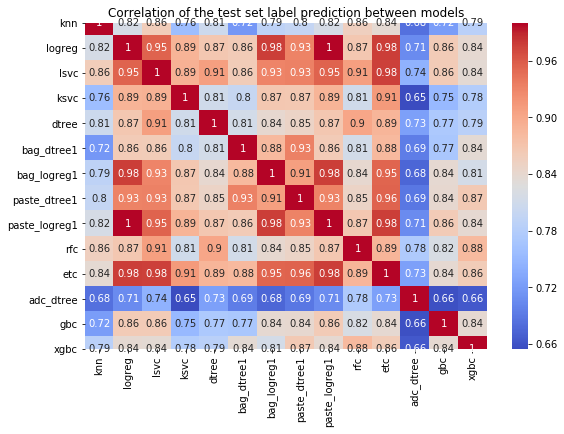

In [68]:
# Plot a heatmap of all correlations for easier visualization
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,6))
g = sns.heatmap(pred.corr(), annot=True, cmap='coolwarm', ax=ax)
g.set_title('Correlation of the test set label prediction between models')

In [69]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_bottom_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=True)
    return au_corr[0:n]


In [70]:
print("Bottom Absolute Correlations")
print(get_bottom_abs_correlations(pred, 5))

Bottom Absolute Correlations
ksvc         adc_dtree    0.654742
adc_dtree    gbc          0.657968
             xgbc         0.664444
bag_logreg1  adc_dtree    0.676081
knn          adc_dtree    0.683989
dtype: float64


###  Use Voting Classifier to combine results of top 5 models (all the models including models you ran for HW2

In [71]:
grid_log.best_estimator_

LogisticRegression(C=1, l1_ratio=0.9, max_iter=10000, penalty='elasticnet',
                   solver='saga')

In [72]:
from sklearn.ensemble import VotingClassifier

In [73]:
vclf1 = VotingClassifier(estimators=
                              [('xgbc', xgbc_grid.best_estimator_), 
                               ( 'dtree', grid_dtree.best_estimator_), 
                               ( 'rfc', rfc_grid.best_estimator_),
                               ( 'logreg', grid_log.best_estimator_),
                               ( 'etc', etc_grid.best_estimator_)
                              ], )
vclf1_param = {
              'voting' : ['hard','soft'],
             }
vclf1_grid = GridSearchCV(vclf1, vclf1_param,cv=5, return_train_score=True, )
vclf1_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=VotingClassifier(estimators=[('xgbc',
                                                     XGBClassifier(base_score=0.5,
                                                                   booster='gbtree',
                                                                   colsample_bylevel=1,
                                                                   colsample_bynode=1,
                                                                   colsample_bytree=1,
                                                                   gamma=0,
                                                                   gpu_id=-1,
                                                                   importance_type='gain',
                                                                   interaction_constraints='',
                                                                   learning_rate=0.1,
                                                                

In [74]:
print(f'Best Mean Cross Validation Score is {vclf1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {vclf1_grid.best_params_}')
print(f'Train score is {vclf1_grid.score(X_train,y_train)}')
print(f'Test score is {vclf1_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8477173913043478
Best Mean Cross Validation Score is {'voting': 'hard'}
Train score is 0.8689138576779026
Test score is 0.8222222222222222


In [75]:
vclf2 = VotingClassifier(estimators=
                              [('xgbc', xgbc_grid.best_estimator_), 
                               ( 'dtree', grid_dtree.best_estimator_), 
                               ( 'rfc', rfc_grid.best_estimator_),
                               ( 'logreg', grid_log.best_estimator_),
                               ( 'etc', etc_grid.best_estimator_)
                                                            ], )
vclf2_param = {
              'voting' : ['hard','soft'],
             }
vclf2_grid = GridSearchCV(vclf2, vclf2_param,cv=5, return_train_score=True, )
vclf2_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=VotingClassifier(estimators=[('xgbc',
                                                     XGBClassifier(base_score=0.5,
                                                                   booster='gbtree',
                                                                   colsample_bylevel=1,
                                                                   colsample_bynode=1,
                                                                   colsample_bytree=1,
                                                                   gamma=0,
                                                                   gpu_id=-1,
                                                                   importance_type='gain',
                                                                   interaction_constraints='',
                                                                   learning_rate=0.1,
                                                                

In [76]:
print(f'Best Mean Cross Validation Score is {vclf2_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {vclf2_grid.best_params_}')
print(f'Train score is {vclf2_grid.score(X_train,y_train)}')
print(f'Test score is {vclf2_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8477173913043478
Best Mean Cross Validation Score is {'voting': 'hard'}
Train score is 0.8689138576779026
Test score is 0.8222222222222222


### Use Voting Classifier to combine results of 5 models with least correlation. 

In [77]:
vclf3 = VotingClassifier(estimators=
                              [('knn', grid_knn.best_estimator_), 
                               ('adc_dtree', adc_dtree_grid.best_estimator_), 
                               ('gbc', gbc_grid.best_estimator_),
                               ('xgbc', gbc_grid.best_estimator_),
                               ('logreg', grid_log.best_estimator_)
                              ], )
vclf3_param = {
              'voting' : ['hard','soft'],
             }
vclf3_grid = GridSearchCV(vclf3, vclf3_param,cv=5, return_train_score=True, )
vclf3_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=VotingClassifier(estimators=[('knn',
                                                     KNeighborsClassifier()),
                                                    ('adc_dtree',
                                                     AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                                              max_depth=4),
                                                                        learning_rate=0.5,
                                                                        n_estimators=100,
                                                                        random_state=42)),
                                                    ('gbc',
                                                     GradientBoostingClassifier(learning_rate=0.5,
                                                                                max_depth=2

In [78]:
print(f'Best Mean Cross Validation Score is {vclf3_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {vclf3_grid.best_params_}')
print(f'Train score is {vclf3_grid.score(X_train,y_train)}')
print(f'Test score is {vclf3_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8352173913043479
Best Mean Cross Validation Score is {'voting': 'soft'}
Train score is 0.9288389513108615
Test score is 0.8444444444444444


### Use Stacking Classifier to combine results of top 5 models (all the models including models you ran for HW2) 

In [79]:
from sklearn.ensemble import StackingClassifier

In [80]:
sclf1 = StackingClassifier(estimators=
                              [('xgbc', xgbc_grid.best_estimator_), 
                               ( 'dtree', grid_dtree.best_estimator_), 
                               ( 'rfc', rfc_grid.best_estimator_),
                               ( 'logreg', grid_log.best_estimator_),
                               ( 'etc', etc_grid.best_estimator_)
                              ], final_estimator=LogisticRegression())
sclf1_param = {
              'final_estimator__C' : [0.1,0.2],
              'stack_method':['auto', 'predict_proba']
             }
sclf1_grid = GridSearchCV(sclf1, sclf1_param,cv=5, return_train_score=True, )
sclf1_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=StackingClassifier(estimators=[('xgbc',
                                                       XGBClassifier(base_score=0.5,
                                                                     booster='gbtree',
                                                                     colsample_bylevel=1,
                                                                     colsample_bynode=1,
                                                                     colsample_bytree=1,
                                                                     gamma=0,
                                                                     gpu_id=-1,
                                                                     importance_type='gain',
                                                                     interaction_constraints='',
                                                                     learning_rate=0.1,
                                          

In [81]:
print(f'Best Mean Cross Validation Score is {sclf1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {sclf1_grid.best_params_}')
print(f'Train score is {sclf1_grid.score(X_train,y_train)}')
print(f'Test score is {sclf1_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8452096273291925
Best Mean Cross Validation Score is {'final_estimator__C': 0.2, 'stack_method': 'auto'}
Train score is 0.8826466916354557
Test score is 0.8444444444444444


### Use Stacking Classifier to combine results of  models with least correlation. 

In [82]:
sclf2 = StackingClassifier(estimators=
                              [('knn', grid_knn.best_estimator_), 
                               ('adc_dtree', adc_dtree_grid.best_estimator_), 
                               ('gbc', gbc_grid.best_estimator_),
                               ('xgbc', gbc_grid.best_estimator_),
                               ('logreg', grid_log.best_estimator_), 
                                                             ], 
                           final_estimator=
                           XGBClassifier(random_state=42,objective= 'binary:logistic'))
sclf2_param = {
              'final_estimator__max_depth' : [2,6],
              'final_estimator__n_estimators' : [50,150],
              'final_estimator__learning_rate' : [0.1,0.6,0.8],
              'final_estimator__min_child_weight' : [1,3,7],
              'final_estimator__subsample':[0.6,0.9,1],
              'stack_method':['auto', 'predict_proba']
             }
sclf2_grid = GridSearchCV(sclf2, sclf2_param,cv=5, return_train_score=True, )
sclf2_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=StackingClassifier(estimators=[('knn',
                                                       KNeighborsClassifier()),
                                                      ('adc_dtree',
                                                       AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                                                max_depth=4),
                                                                          learning_rate=0.5,
                                                                          n_estimators=100,
                                                                          random_state=42)),
                                                      ('gbc',
                                                       GradientBoostingClassifier(learning_rate=0.5,
                                                                       

In [83]:
print(f'Best Mean Cross Validation Score is {sclf2_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {sclf2_grid.best_params_}')
print(f'Train score is {sclf2_grid.score(X_train,y_train)}')
print(f'Test score is {sclf2_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8364673913043479
Best Mean Cross Validation Score is {'final_estimator__learning_rate': 0.1, 'final_estimator__max_depth': 2, 'final_estimator__min_child_weight': 7, 'final_estimator__n_estimators': 50, 'final_estimator__subsample': 1, 'stack_method': 'auto'}
Train score is 0.9250936329588015
Test score is 0.8333333333333334


# Models used with hyperparameters :

Logistic Regression (Penalty, C, solver)

Decision Tree (max_leaf_nodes,criterion,splitter)

KNN Classifier (n_neighbors)

SVM Models : LinearSCV(penalty, C)
             rbf (C, gamma)
             Sigmoid (C, gamma)
             polynomial (kernel, C, degree)
             
Bagging : Decision Tree (base_estimator__max_depth,max_samples, n_estimators)
          Logistic Regression (base_estimator__C,max_samples, n_estimators)
          
Pasting : Decision Tree (base_estimator__max_depth,max_samples, n_estimators)
          Logistic Regression (base_estimator__C,max_samples, n_estimators)
          
Random Forests (n_estimators, max_features,max_depth,criterion)

Ada Boost (base_estimator__criterion, base_estimator__splitter,base_estimator__max_depth, n_estimators,learning_rate)

Gradient Boost (max_depth, n_estimators, learning_rate)

Extra Trees (n_estimators,max_features, max_depth,criterion)

XG Boost ('max_depth,n_estimators,learning_rate,min_child_weight,subsample)
              
### XGBoost Classifier is the best model as the cross validation score is high and the difference between train score and test score is less.

Best model based on Scoring Method = Accuracy

The best model choosen based on CV score (0.85) is : XG Boost.

Best Mean Cross Validation Score is 0.8514052795031055

Parameters for the model {'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 7, 'n_estimators': 150, 'subsample': 0.9}

Train score is 0.8951310861423221

Test score is 0.8333333333333334
